   
# #PyCon2019: Hello World of Machine Learning using Scikit-learn


## [11] - Exercise - Mapping Application


<br/><br/>

___Given: Set of hospitals in a geographic location___

<br/>

___Find: The nearest hospital from a point___

<br/><br/>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
location = np.array([[1.5,1.0],   # 0 
                   [1.5,6],     # 1
                   [3.5,3],     # 2
                   [2.5,3],     # 3
                   [4,4],       # 4
                   [5,2],       # 5
                   [6,3.5],     # 6
                   [7,4]])      # 7

<br/>

___Let's plot the points___

<br/>

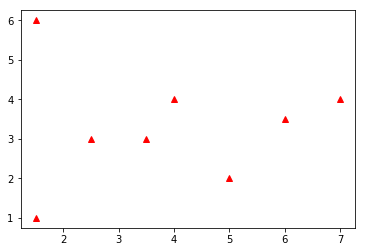

In [4]:
plt.plot(location[:,0], location[:,1], "r^")

<br/><br/>

___Let's first find the same using KNN___

<br/><br/>


In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn  = KNeighborsClassifier(1)

___Let's generate a label for each of the data Points___

In [7]:
y_label = np.array([0,1,2,3,4,5,6,7]) # let's assume they are hospital number "0" to hospital number "7"

In [8]:
knn.fit(location,y_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [9]:
check_loc = np.array([[1,7], [8,2]]).reshape(-1,2)
predict = knn.predict(check_loc)

In [10]:
predict

array([1, 7])

<br/><br/>

___index => 1 is nearest to [1,7] and index =>7 is nearest to [8,2]___

<br/><br/>

In [ ]:
plt.plot(location[:,0], location[:,1], "r^")
plt.plot(check_loc[:,0], check_loc[:,1], "g*")

<br/><br/><br/><br/><br/><br/>

### Machine Learning Vs Data Structures

<br/><br/><br/>

___Machine Learning is all about embracing variability and validating out algorithms continuously. Though KNN seemingly works fine over here, there are other algorithms / Data Structures available and should be checked. Sometimes, for a particular set of problems we can find a better solution with Data Strutures___

<br/><br/><br/>

___In KNN, we know which point is nearest, but can we answer a question if the nearest point is with 2 miles ?___

<br/><br/><br/>

___For KNN, even if the first nearest point is 100 miles, it will returned as nearest___

<br/><br/><br/>

### KD-Trees ( K - Dimension Trees )

<br/><br/><br/>

___Used for finding distance vectors within a range___

<br/><br/><br/>

___KDTree a space-partitioning data structure for organizing points in a k-dimensional space.___

<br/><br/><br/>

___It's more of a Data Structure than a Machine Learning Algorithm which sometimes works better than ML___

<br/><br/><br/>

In [11]:
from scipy.spatial import KDTree

In [20]:
kdt = KDTree(location)

<br/><br/>

___We don't use .fit(...) / .predict(...) over here, because the points are partitioned as soon as KDTree is contructed___

<br/><br/>

In [13]:
kdt.data

array([[1.5, 1. ],
       [1.5, 6. ],
       [3.5, 3. ],
       [2.5, 3. ],
       [4. , 4. ],
       [5. , 2. ],
       [6. , 3.5],
       [7. , 4. ]])

In [16]:
query_loc = np.array([[8.5, 2.1]])

In [18]:
min_dist, min_dist_index = kdt.query(query_loc, distance_upper_bound=2)
min_dist, min_dist_index

(array([inf]), array([8]))

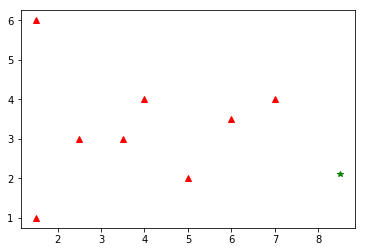

In [19]:
plt.plot(location[:,0], location[:,1], "r^")
plt.plot(query_loc[:,0], query_loc[:,1], "g*")

In [ ]:
location[2]

<br/><br/>

<br/><br/>

In [21]:
query_loc = np.array([[3.5, 2.1], [5.5,6]])

In [22]:
min_dist, min_dist_index = kdt.query(query_loc, distance_upper_bound=3)
min_dist, min_dist_index

(array([0.9, 2.5]), array([2, 4]))

In [ ]:
plt.plot(location[:,0], location[:,1], "r^")
plt.plot(query_loc[:,0], query_loc[:,1], "g*")

In [ ]:
location[4]